Conduct analysis on the provided data to identify the characteristics of users who check out, and those who don't. 

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?
2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.
3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

Once you're finished, submit your completed notebook with answers to the above questions included in Markdown cells. Your code should be legible, easy to follow, and your answers to the questions should be clear and precise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df= pd.read_csv(r'C:\Users\rahul\Desktop\MBAN\Data Science\Midterm\midterm_data.csv')

In [4]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


We have missing data only for Device and Location. Since only 2% of the device data and .6% of the location data is missing, I would fill these missing values with the top values, which is 'Desktop' for device and 'Location 4' for Location.

In [6]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Before filling, let's check if there are any rows in which both these columns have missing values

In [9]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [10]:
#lets drop this row
df.drop(df[df['device'].isnull() & df['location'].isnull()].index, axis=0, inplace=True)

In [11]:
#Let's fill the remaining with the top values
df['device'] = df['device'].fillna('Desktop')

In [12]:
#Let's fill the remaining with the top values
df['location'] = df['location'].fillna('Location 4')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4999 non-null   object 
 9   location         4999 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


In [20]:
df.drop_duplicates(inplace=True)

Drop duplicates, if any

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4999 non-null   object 
 9   location         4999 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


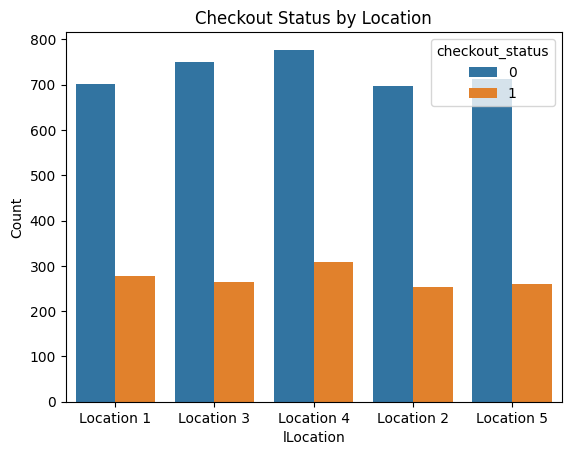

In [49]:

import matplotlib.pyplot as plt
sns.countplot(data=df, x='location', hue='checkout_status')

# Adding labels and title to the plot
plt.xlabel('lLocation')
plt.ylabel('Count')
plt.title('Checkout Status by Location')

# Displaying the plot
plt.show()

Since checkout_status for all the location is equivalent, we can make suggestion based on location, let's try some stats testing 

In [24]:
# 1) Characteristics of users who complete check out vs those who do not
checkout_users = df[df['checkout_status'] == 1]
non_checkout_users = df[df['checkout_status'] == 0]

checkout_age_mean = checkout_users['age'].mean()
non_checkout_age_mean = non_checkout_users['age'].mean()

checkout_sessions_mean = checkout_users['sessions'].mean()
non_checkout_sessions_mean = non_checkout_users['sessions'].mean()

checkout_time_spent_mean = checkout_users['time_spent'].mean()
non_checkout_time_spent_mean = non_checkout_users['time_spent'].mean()

checkout_pages_visited_mean = checkout_users['pages_visited'].mean()
non_checkout_pages_visited_mean = non_checkout_users['pages_visited'].mean()

checkout_cart_items_mean = checkout_users['cart_items'].mean()
non_checkout_cart_items_mean = non_checkout_users['cart_items'].mean()

checkout_cart_value_mean = checkout_users['cart_value'].mean()
non_checkout_cart_value_mean = non_checkout_users['cart_value'].mean()

In [25]:
print("Checkout Users:")
print("  Average Age:             {:.2f}".format(checkout_age_mean))
print("  Average Sessions:        {:.2f}".format(checkout_sessions_mean))
print("  Average Time Spent:      {:.2f}".format(checkout_time_spent_mean))
print("  Average Pages Visited:   {:.2f}".format(checkout_pages_visited_mean))
print("  Average Cart Items:      {:.2f}".format(checkout_cart_items_mean))
print("  Average Cart Value:      {:.2f}".format(checkout_cart_value_mean))

print("\nNon-Checkout Users:")
print("  Average Age:             {:.2f}".format(non_checkout_age_mean))
print("  Average Sessions:        {:.2f}".format(non_checkout_sessions_mean))
print("  Average Time Spent:      {:.2f}".format(non_checkout_time_spent_mean))
print("  Average Pages Visited:   {:.2f}".format(non_checkout_pages_visited_mean))
print("  Average Cart Items:      {:.2f}".format(non_checkout_cart_items_mean))
print("  Average Cart Value:      {:.2f}".format(non_checkout_cart_value_mean))

Checkout Users:
  Average Age:             41.33
  Average Sessions:        4.94
  Average Time Spent:      31.32
  Average Pages Visited:   7.29
  Average Cart Items:      14.12
  Average Cart Value:      140.82

Non-Checkout Users:
  Average Age:             41.62
  Average Sessions:        5.06
  Average Time Spent:      22.85
  Average Pages Visited:   5.21
  Average Cart Items:      15.28
  Average Cart Value:      152.64


Just from getting the mean, we can see that average Time spent can be an important factor to for checkout status. We'll do some testing.

In [32]:
from scipy import stats
from scipy.stats import pearsonr

pearson_corr, p_val = stats.pearsonr(df['checkout_status'], df['time_spent'])

print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation: 0.38358247864419615
P-value: 5.914986101148577e-175


The Pearson correlation coefficient between 'checkout_status' and 'time_spent' is 0.384, and the p-value is extremely small (approximately 5.915e-175).

Based on these results:

The correlation coefficient of 0.384 indicates a positive correlation between 'checkout_status' and 'time_spent'. However, the strength of the correlation is moderate.
The p-value being close to zero suggests that the observed correlation is statistically significant.


In summary, there is a moderate positive correlation between 'checkout_status' and 'time_spent', and this correlation is statistically significant. It implies that as 'time_spent' increases, the likelihood of 'checkout_status' being positive (1) also tends to increase.

From the P-value and the pearson' correlation we can say that time-spent is closely related to checkout_status. Let's check for other variables.

In [41]:
from scipy import stats
from scipy.stats import pearsonr

pearson_corr_age, p_val_age = stats.pearsonr(df['checkout_status'], df['age'])
print(f"Pearson's correlation between checkout_status and age: {pearson_corr_age}")
print(f"P-value: {p_val_age}")

# Calculate Pearson correlation and p-value for Sessions
pearson_corr_sessions, p_val_sessions = stats.pearsonr(df['checkout_status'], df['sessions'])
print(f"Pearson's correlation between checkout_status and Sessions: {pearson_corr_sessions}")
print(f"P-value: {p_val_sessions}")

# Calculate Pearson correlation and p-value for pages_visited
pearson_corr_pages_visited, p_val_pages_visited = stats.pearsonr(df['checkout_status'], df['pages_visited'])
print(f"Pearson's correlation between checkout_status and pages_visited: {pearson_corr_pages_visited}")
print(f"P-value: {p_val_pages_visited}")

# Calculate Pearson correlation and p-value for cart_items
pearson_corr_cart_items, p_val_cart_items = stats.pearsonr(df['checkout_status'], df['cart_items'])
print(f"Pearson's correlation between checkout_status and cart_items: {pearson_corr_cart_items}")
print(f"P-value: {p_val_cart_items}")

# Calculate Pearson correlation and p-value for cart_values
pearson_corr_cart_values, p_val_cart_values = stats.pearsonr(df['checkout_status'], df['cart_value'])
print(f"Pearson's correlation between checkout_status and cart_values: {pearson_corr_cart_values}")
print(f"P-value: {p_val_cart_values}")

Pearson's correlation between checkout_status and age: -0.009437567874991143
P-value: 0.5046967171568824
Pearson's correlation between checkout_status and Sessions: -0.019920969858695806
P-value: 0.15905056686572647
Pearson's correlation between checkout_status and pages_visited: 0.3602566910945144
P-value: 4.49250940875037e-153
Pearson's correlation between checkout_status and cart_items: -0.0855449069824046
P-value: 1.3788633610632458e-09
Pearson's correlation between checkout_status and cart_values: -0.0766078006415144
P-value: 5.8586095594179994e-08


Based on the results:

1) The correlation coefficient between 'checkout_status' and 'age' is -0.009, indicating a very weak negative correlation. The p-value is 0.505. Therefore, there is no significant correlation between 'checkout_status' and 'age'.

2) The correlation coefficient between 'checkout_status' and 'Sessions' is -0.020, indicating a very weak negative correlation. The p-value is 0.159, which is greater than 0.05. Similar to the previous case, there is no significant correlation between 'checkout_status' and 'Sessions'.

3) The correlation coefficient between 'checkout_status' and 'pages_visited' is 0.360, indicating a moderate positive correlation. The p-value is extremely small (approximately 4.49e-153), well below the significance level. Therefore, there is a significant correlation between 'checkout_status' and 'pages_visited', suggesting that users who visit more pages are more likely to proceed to the checkout.

4) The correlation coefficient between 'checkout_status' and 'cart_items' is -0.086, indicating a weak negative correlation. The p-value is very small (approximately 1.38e-09), indicating a significant correlation. This suggests that there is a relationship between 'checkout_status' and the number of items in the cart, with a negative correlation indicating that users with fewer cart items are more likely to proceed to checkout.

5) The correlation coefficient between 'checkout_status' and 'cart_values' is -0.077, indicating a weak negative correlation. The p-value is also small (approximately 5.86e-08), indicating a significant correlation. This suggests that there is a relationship between 'checkout_status' and the value of items in the cart, with a negative correlation indicating that users with lower cart values are more likely to proceed to checkout.

Overall, the analysis shows that the 'pages_visited', 'cart_items', and 'cart_values' variables have significant correlations with the 'checkout_status'. However, 'age' and 'Sessions' do not exhibit a significant correlation with 'checkout_status' based on the provided results.

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

1) Based on my analysis I would like to concule the following:

    i) Users who complete checkout tends to spend significantly more time than user who don't checkout.

    ii) Users who visit more pages are more likely to proceed to the checkout.

    iii) Users with fewer cart items are more likely to proceed to checkout.

    iv) Users with lower cart values are more likely to proceed to checkout


2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

I prepared my data for analysis in the following way:

    i) After loading the datasets, I looked for various data types in the set. 

    ii) I looked for missing values, since the number was very small I filled it with the top values.

    iii) I looked for duplicates, but there wasn't any.

    iv) I tried to establish a relation visually between checout status and location, but couldn't determine any significant relation.

    V) Lastly I used T-statistics and P-value to analyze the data and conclude with my findings.


3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

Since mean for both checkout users and non-checout users is 41, I would recommend targetting these people and try to enage more in our website so that they spent more time on it, and so they will tend to spend more.

They can do so my introducing a wide range of offers for people of certain age groups (Above 40).